# Lab: Linear regression, part 1
In this lab we will start performing linear regression in Python.


In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

1. Read the CPU performance data from this csv file into a Pandas DataFrame named 'df'. 
https://raw.githubusercontent.com/grbruns/cst383/master/machine.csv
You may want to add the 'clock speed' feature, as shown in the hints section below.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/machine.csv")
df.index = df['vendor']+' '+df['model']
df.drop(['vendor', 'model'], axis=1, inplace=True)
df['cs'] = np.round(1e3/df['myct'], 2) # clock speed in MHz (millions of cycles/sec)

2. Look at the information on the following page to learn about what the column names mean.  ‘prp’ 
is the variable that we will try to estimate with linear regression.
https://archive.ics.uci.edu/ml/datasets/Computer+Hardware
Note that this data is from way back in 1988 and has little to do with today’s CPUs.


### Attribute Information:

1. vendor name: 30
2. Model Name: many unique symbols
3. MYCT: machine cycle time in nanoseconds (integer)
4. MMIN: minimum main memory in kilobytes (integer)
5. MMAX: maximum main memory in kilobytes (integer)
6. CACH: cache memory in kilobytes (integer)
7. CHMIN: minimum channels in units (integer)
8. CHMAX: maximum channels in units (integer)
9. PRP: published relative performance (integer)
10. ERP: estimated relative performance from the original article (integer)

3. Create a matrix of scatter plots using the Seaborn pairplot function.  Do some features appear to 
be strongly correlated?


- To predict **PRP** it looks like **ERP** would be a good candiate to apply a linear regression model followed by **cs** 

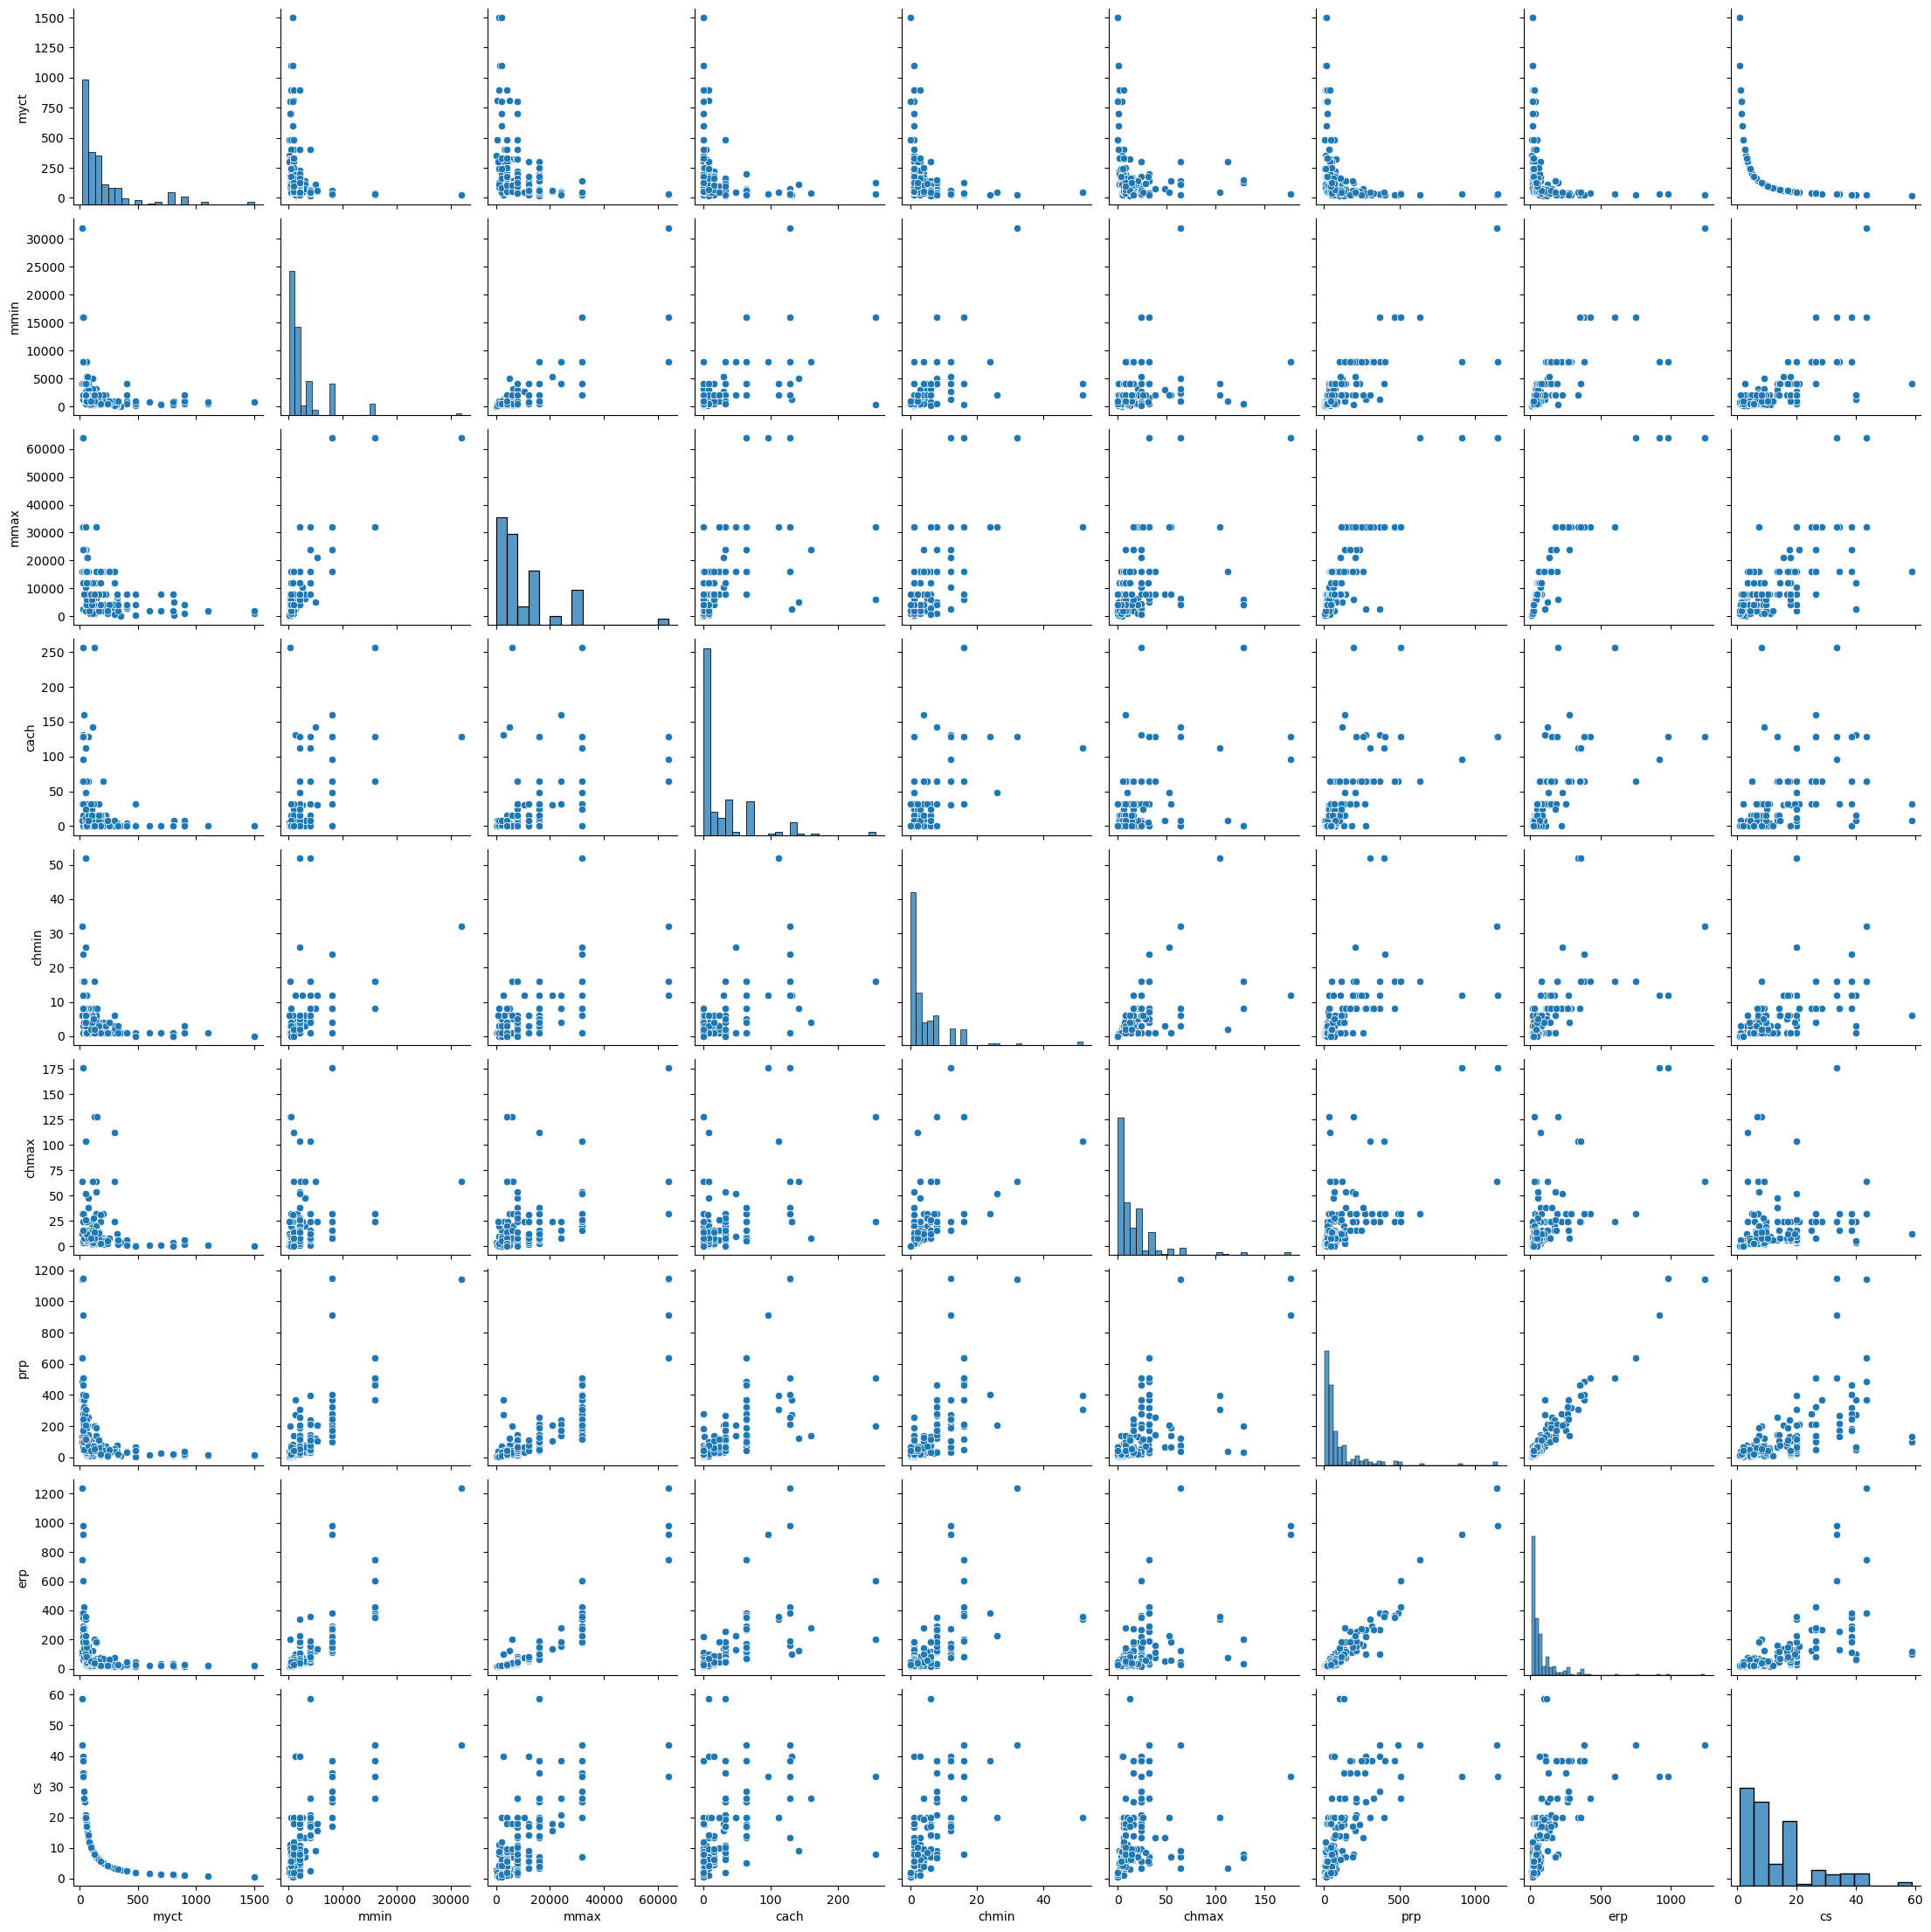

In [5]:
sns.pairplot(df)

In [3]:
df

,myct,mmin,mmax,cach,chmin,chmax,prp,erp,cs
adviser 32/60,125,256,6000,256,16,128,198,199,8.00
amdahl 470v/7,29,8000,32000,32,8,32,269,253,34.48
amdahl 470v/7a,29,8000,32000,32,8,32,220,253,34.48
amdahl 470v/7b,29,8000,32000,32,8,32,172,253,34.48
amdahl 470v/7c,29,8000,16000,32,8,16,132,132,34.48
...,...,...,...,...,...,...,...,...,...
sperry 80/8,124,1000,8000,0,1,8,42,37,8.06
sperry 90/80-model-3,98,1000,8000,32,2,8,46,50,10.20
sratus 32,125,2000,8000,0,2,14,52,41,8.00
wang vs-100,480,512,8000,32,0,0,67,47,2.08


4. Pick a feature (like ‘mmin’, ‘mmax’, ‘cach’, etc.) and produce a scatterplot with that feature on the 
x axis and ‘prp’ on the y axis.  Does prp seem to change linearly with respect to the feature you 
chose?  Describe the pattern: what is the trend, how focused is the pattern, are there outliers, 
etc.?


<AxesSubplot: xlabel='erp', ylabel='prp'>

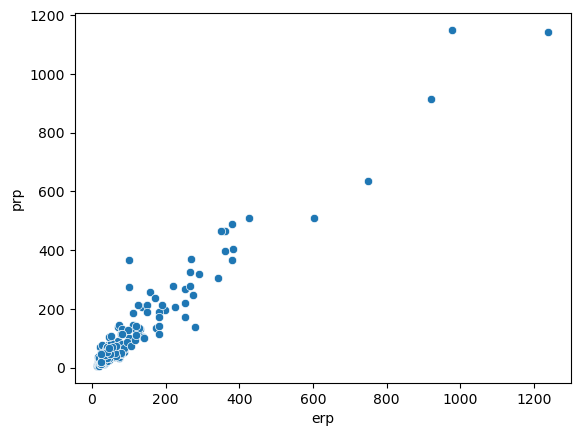

In [9]:
sns.scatterplot(data=df, x='erp', y='prp')

5. Fit a linear model to the data using sklearn.linear_model.LinearRegression.  The model should have 
‘prp’ as its target variable, and the feature you chose as its single predictor variable.  Assign the 
model to variable ‘fit’.
`

In [28]:
fit = LinearRegression()
fit.fit(df[['erp']], df['prp'])

LinearRegression()

6. Plot the predicted relationship on top of your plot of problem 4 above.  Compare your plot to the 
one you would get with Seaborn's regplot (which will find and plot the regression line for you).
  

<AxesSubplot: xlabel='erp', ylabel='prp'>

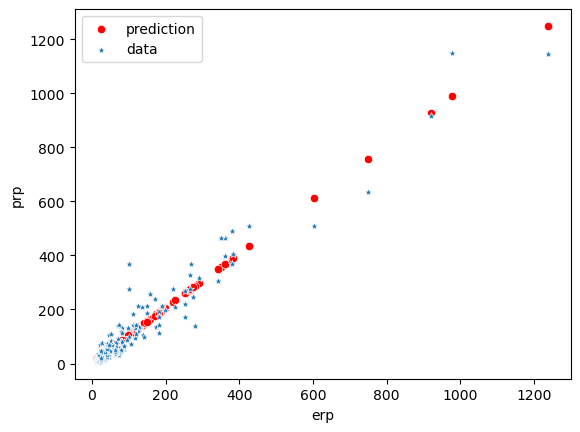

In [39]:

predictions = fit.predict(df[['erp']])
sns.scatterplot(x=df['erp'], y=predictions, color='red', label='prediction')
sns.scatterplot(data=df, x='erp', y='prp', marker='*',label='data')

7. Create a scatterplot with the actual 'prp' value on the X axis and the predicted 'prp' value on the Y 
axis.   If your predictions were great, what would this plot look like?
- If the model was great, the points would all be near the line y=x  


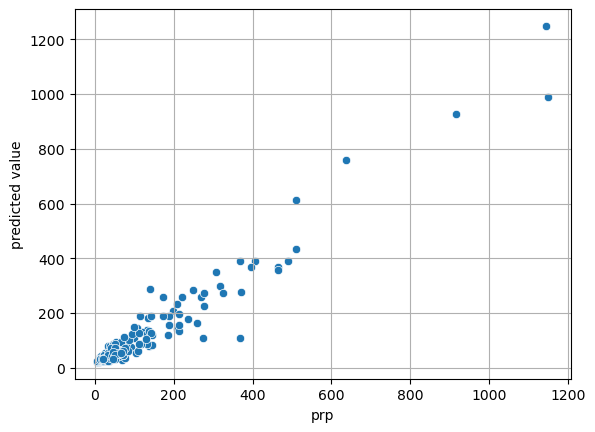

In [43]:
sns.scatterplot(x=df['prp'], y=predictions)
plt.ylabel('predicted value')
plt.grid()

8. If you still have time, try again, using different features as your predictors.  Try multiple predictors.  
In each case, plot the actual vs. predicted values, as in the last problem.